In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd
import numpy as np

### TODO 
- Daten bla bla als Funktionen verpacken
- Loss überlegen
- mit IO autonamitisch Julia skirpt öffnen zum prüfen ob mehr reelle
- netz mit dropout???
- callbacks
- loose float precision / fix?

In [17]:
# Load Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)
df = df.drop('Counts', axis=1)

In [18]:
# Prepare Data
data_in = np.array(df[[col for col in df.columns if col[0].islower()]].values.tolist(), dtype=float)
data_out = np.array(df[[col for col in df.columns if col[0].isupper()]].values.tolist(), dtype=float) # - data_in  # betrachte Schritt und nicht das Ziel
n = int(0.9*len(data_in))

train_in = data_in[1:n]
train_out = data_out[1:n]
val_in = data_in[n:]
val_out = data_out[n:]

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_dim=(18), activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu')
])


model.compile(optimizer="Adam", loss=tf.keras.losses.MeanSquaredLogarithmicError(), metrics=["mae"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1000)              19000     
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_11 (Dense)             (None, 18)                18018     
Total params: 1,038,018
Trainable params: 1,038,018
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(
    x=train_in,
    y=train_out,
    epochs=100,
    batch_size=64,
    shuffle=True,
    validation_data=(val_in, val_out),
    verbose=2,
)

Train on 89999 samples, validate on 10000 samples
Epoch 1/100
89999/89999 - 55s - loss: 0.0179 - mae: 0.1470 - val_loss: 0.0162 - val_mae: 0.1403
Epoch 2/100
89999/89999 - 54s - loss: 0.0161 - mae: 0.1402 - val_loss: 0.0157 - val_mae: 0.1389
Epoch 3/100
89999/89999 - 55s - loss: 0.0153 - mae: 0.1369 - val_loss: 0.0143 - val_mae: 0.1317
Epoch 4/100
89999/89999 - 54s - loss: 0.0139 - mae: 0.1317 - val_loss: 0.0128 - val_mae: 0.1271
Epoch 5/100
89999/89999 - 53s - loss: 0.0122 - mae: 0.1246 - val_loss: 0.0112 - val_mae: 0.1217
Epoch 6/100
89999/89999 - 53s - loss: 0.0103 - mae: 0.1161 - val_loss: 0.0091 - val_mae: 0.1108
Epoch 7/100
89999/89999 - 55s - loss: 0.0085 - mae: 0.1073 - val_loss: 0.0074 - val_mae: 0.1006
Epoch 8/100
89999/89999 - 54s - loss: 0.0071 - mae: 0.0991 - val_loss: 0.0060 - val_mae: 0.0925
Epoch 9/100
89999/89999 - 53s - loss: 0.0058 - mae: 0.0915 - val_loss: 0.0051 - val_mae: 0.0866
Epoch 10/100
89999/89999 - 54s - loss: 0.0049 - mae: 0.0852 - val_loss: 0.0041 - val_m

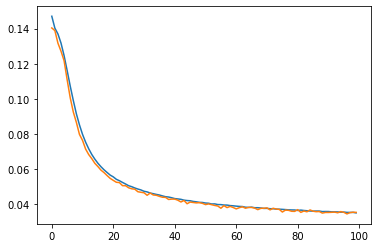

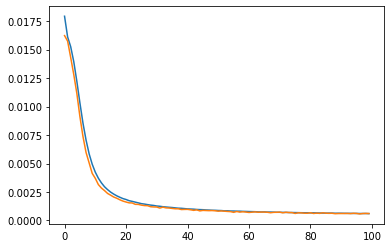

In [21]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure()
plt.plot(mae)
plt.plot(val_mae)

fig = plt.figure()
plt.plot(loss)
plt.plot(val_loss)

In [ ]:
model.predict([[0 for _ in range(18)], [0 for _ in range(18)]])